# Outlier Detection
1. Point Outliers: Observations outliers with respect to majority of the observations in a feature
2. Contextual Outliers: observations considered anomalous given a specific context
3. Collective Outliers: collection of observations anomalous but appear close to one another because they all have a similar anamolous value


Methods for Outlier Detection:
1. Extreme value analysis with the Tukey methods
2. Multivariate analysis with boxplots and scatterplot matrices
3. Machine Learning methods like DBSCAN and PCA

Usecases:
1. Equipment Failure
2. Fraud
3. Cybersecurity event


In [7]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn import datasets
from matplotlib import rcParams
import seaborn as sb

 # this lets plots to be plotted in same window
%matplotlib inline
rcParams['figure.figsize'] = 7, 5 # 5 inch cross 4 inch figures
sb.set_style('whitegrid')



In [8]:
df = pd.read_csv(filepath_or_buffer = '/Users/dhanashreepokale/Downloads/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch05/05_01/iris.data.csv', header=None, sep=',')
df.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
X = df.ix[:,0:4].values
y = df.ix[:,4].values
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

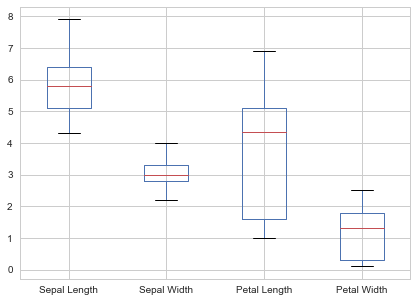

In [9]:
# Identify outliers from Tukey Boxplots
df.boxplot(return_type = 'dict')
plt.plot()

In [14]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width>4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [15]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width<2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


In [16]:
# Applying Tukey outlier labeling
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [ ]:
# Using above table we can find outliers. 
# IQR = 3.3 - 2.8 = 0.5 for variable =1;
# 1.5(IQR) = 0.75; 
# 2.8- 0.75= 2.05 and 3.3+0.75= 4.05. 
# Thus both min and max are outliers as they are less or greater respectively from our observations.


# Multivariate Outlier Detection
1. Boxplots
2. Scatter Plots

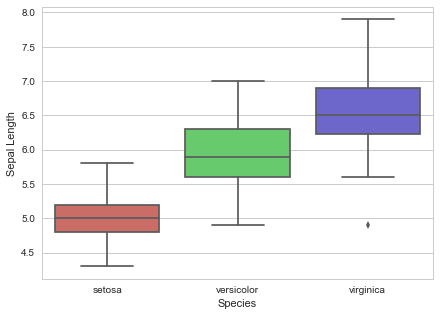

In [19]:
sb.boxplot(x = 'Species', y = 'Sepal Length', data = df,palette ='hls')

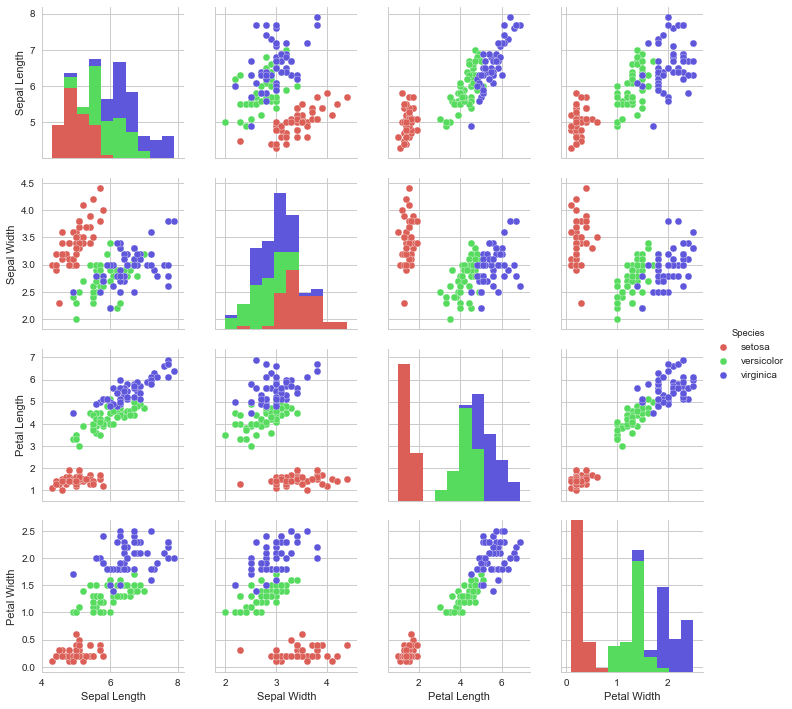

In [20]:
sb.pairplot(df, hue ='Species', palette = 'hls')

# DBSCAN for Outlier Detection

    DBSCAN is unsupervised method that clusters core samples(dense areas of a dataset) and denotes non-core samples (sparse portions)  of a dataset
    
Used to identify collective outliers
    
Outliers should make up <= 5% of the total observations - adjust model parameters accordingly
    
2 important parameters for DBSCAN Models are
    a. eps: the max distance between  2 samples for them to be clustered in the same neighbourhood (start at eps =0.1)
    b. min_samples: min number of samples  in a neighborhood for a data point to qualify as a core point

In [22]:
import sklearn 
from sklearn.cluster import DBSCAN
from collections import Counter

In [25]:
model = DBSCAN(eps = 0.8, min_samples =19).fit(X)
print(model)


DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)


In [29]:
outliers_df = pd.DataFrame(X)
print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
      0   1   2   3
98  5.1 2.5 3.0 1.1
105 7.6 3.0 6.6 2.1
117 7.7 3.8 6.7 2.2
118 7.7 2.6 6.9 2.3
122 7.7 2.8 6.7 2.0
131 7.9 3.8 6.4 2.0


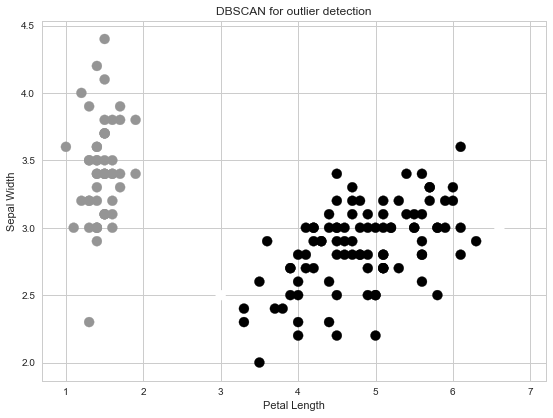

In [32]:
fig= plt.figure()
ax= fig.add_axes([0.1,0.1,1,1])

colors = model.labels_

ax.scatter(X[:,2],X[:,1], c= colors, s= 100)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outlier detection')

In [ ]:
# The white points are outliers. Rest are core samples.